In [41]:
# 导入相关的模块
import pandas as pd

In [42]:
df = pd.read_csv("../datasets/archive.csv",encoding = "utf-8",index_col=0)
years = list(df.index)
years.remove(2014)
df

,1,2,3,4,5,6,7,8,9,10,11,12,全年
月份,,,,,,,,,,,,,
2014,16.3,72.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.4
2013,26.2,58.0,147.3,413.7,299.7,312.6,52.3,194.4,99.3,12.7,129.2,61.5,1806.9
2012,117.8,84.1,160.1,285.1,197.2,487.0,200.5,141.7,129.7,32.8,162.1,68.9,2067.0
2011,26.8,58.0,118.1,58.6,276.7,421.8,75.2,63.0,63.2,43.0,36.8,13.1,1254.3
2010,113.2,4.0,30.8,455.9,235.0,530.7,193.9,18.6,124.1,6.0,22.4,121.1,1855.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,19.0,65.8,104.3,55.9,264.7,241.4,388.0,290.9,42.7,11.9,55.6,34.7,1574.9
1954,96.0,59.1,55.7,692.1,434.0,441.0,120.9,153.4,46.2,10.5,9.8,43.5,2162.2
1953,129.1,120.4,196.9,152.3,543.2,195.3,107.0,52.3,126.8,218.1,61.6,154.0,2057.0


### Part1 分析降雨量在近几十年来的季节性特征

In [43]:
# 查看数据的缺失值情况
df.isnull().sum()

1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
全年    0
dtype: int64

- 可以清楚看出，只有2014年的3~12月数据是缺失的，因此我们处理part1不需要此部分的数据

In [44]:
# 查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 2014 to 1951
Data columns (total 13 columns):
1     64 non-null float64
2     64 non-null float64
3     63 non-null float64
4     63 non-null float64
5     63 non-null float64
6     63 non-null float64
7     63 non-null float64
8     63 non-null float64
9     63 non-null float64
10    63 non-null float64
11    63 non-null float64
12    63 non-null float64
全年    64 non-null float64
dtypes: float64(13)
memory usage: 7.0 KB


In [45]:
# 先暂时删除含有Nan的行
data = df.dropna()
data

,1,2,3,4,5,6,7,8,9,10,11,12,全年
月份,,,,,,,,,,,,,
2013,26.2,58.0,147.3,413.7,299.7,312.6,52.3,194.4,99.3,12.7,129.2,61.5,1806.9
2012,117.8,84.1,160.1,285.1,197.2,487.0,200.5,141.7,129.7,32.8,162.1,68.9,2067.0
2011,26.8,58.0,118.1,58.6,276.7,421.8,75.2,63.0,63.2,43.0,36.8,13.1,1254.3
2010,113.2,4.0,30.8,455.9,235.0,530.7,193.9,18.6,124.1,6.0,22.4,121.1,1855.7
2009,11.1,23.4,152.6,189.3,369.9,335.2,565.2,24.4,66.9,21.3,52.8,54.3,1866.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,19.0,65.8,104.3,55.9,264.7,241.4,388.0,290.9,42.7,11.9,55.6,34.7,1574.9
1954,96.0,59.1,55.7,692.1,434.0,441.0,120.9,153.4,46.2,10.5,9.8,43.5,2162.2
1953,129.1,120.4,196.9,152.3,543.2,195.3,107.0,52.3,126.8,218.1,61.6,154.0,2057.0


In [46]:
# 因为是寻求季节性特征，因此需要将数据分春、夏、秋、冬各个季节
# 关闭显示的Warning通知
pd.set_option('mode.chained_assignment', None)
data['Spring'] = data["3"] + data["4"] + data["5"]
data['Summer'] = data["6"] + data["7"] + data["8"]
data['Fall'] = data["9"] + data["10"] + data["11"]
data['Winter'] = data["12"] + data["1"] + data["2"]
data

,1,2,3,4,5,6,7,8,9,10,11,12,全年,Spring,Summer,Fall,Winter
月份,,,,,,,,,,,,,,,,,
2013,26.2,58.0,147.3,413.7,299.7,312.6,52.3,194.4,99.3,12.7,129.2,61.5,1806.9,860.7,559.3,241.2,145.7
2012,117.8,84.1,160.1,285.1,197.2,487.0,200.5,141.7,129.7,32.8,162.1,68.9,2067.0,642.4,829.2,324.6,270.8
2011,26.8,58.0,118.1,58.6,276.7,421.8,75.2,63.0,63.2,43.0,36.8,13.1,1254.3,453.4,560.0,143.0,97.9
2010,113.2,4.0,30.8,455.9,235.0,530.7,193.9,18.6,124.1,6.0,22.4,121.1,1855.7,721.7,743.2,152.5,238.3
2009,11.1,23.4,152.6,189.3,369.9,335.2,565.2,24.4,66.9,21.3,52.8,54.3,1866.4,711.8,924.8,141.0,88.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,19.0,65.8,104.3,55.9,264.7,241.4,388.0,290.9,42.7,11.9,55.6,34.7,1574.9,424.9,920.3,110.2,119.5
1954,96.0,59.1,55.7,692.1,434.0,441.0,120.9,153.4,46.2,10.5,9.8,43.5,2162.2,1181.8,715.3,66.5,198.6
1953,129.1,120.4,196.9,152.3,543.2,195.3,107.0,52.3,126.8,218.1,61.6,154.0,2057.0,892.4,354.6,406.5,403.5


In [48]:
# 现在可以绘制关于季节性的柱状图，用于观察
from pyecharts.charts import Bar
import pyecharts
from pyecharts import options as opts

pyecharts.globals._WarningControl.ShowWarning = False

bar = Bar()
Bar(init_opts=opts.InitOpts(width="2000px"))
bar.add_xaxis(years)
# 将浮点数转换为整型
spring = [int(x) for x in data["Spring"].to_list()]
summer = [int(x) for x in data["Summer"].to_list()]
fall = [int(x) for x in data["Fall"].to_list()]
winter = [int(x) for x in data["Winter"].to_list()]
bar.set_global_opts(
    xaxis_opts=opts.AxisOpts(name = '年'),
    yaxis_opts=opts.AxisOpts(name = '降雨量/mm')
)
bar.add_yaxis("春",spring)
bar.add_yaxis("夏",summer)
bar.add_yaxis("秋",fall)
bar.add_yaxis("冬",winter)

bar.render_notebook()

In [49]:
# 下面是来绘制各年份对于的四个季节的降雨量折线图
# 先求各个季节的平均降雨量水平

spring_average = sum(spring) / len(spring)
summer_average = sum(summer) / len(summer)
fall_average = sum(fall) / len(fall)
winter_average = sum(winter) / len(winter)
# 其实从这就能看出春、夏降水多，秋、冬降水少
print(spring_average,summer_average,fall_average,winter_average)

719.3333333333334 737.7301587301587 229.17460317460316 196.4126984126984


In [69]:
from pyecharts.charts import Pie
from pyecharts import options

# 绘制四季降水量饼状图
data = [("春", spring_average), ("夏", summer_average), ("秋", fall_average), ("冬", winter_average)]
pie = Pie()
pie.add(
    # 设置系列名称
    series_name="四季降水量均值",
    # 设置需要展示的数据
    data_pair=data,
    # 设置圆环空心部分和数据显示部分的比例
    radius=["30%", "70%"],
    # 设置饼是不规则的
    rosetype="radius"

)
pie.set_series_opts(label_opts=options.LabelOpts(formatter="{b}: {d}%"))
pie.set_global_opts(title_opts=options.TitleOpts(title="四季降水量"))
pie.render_notebook()

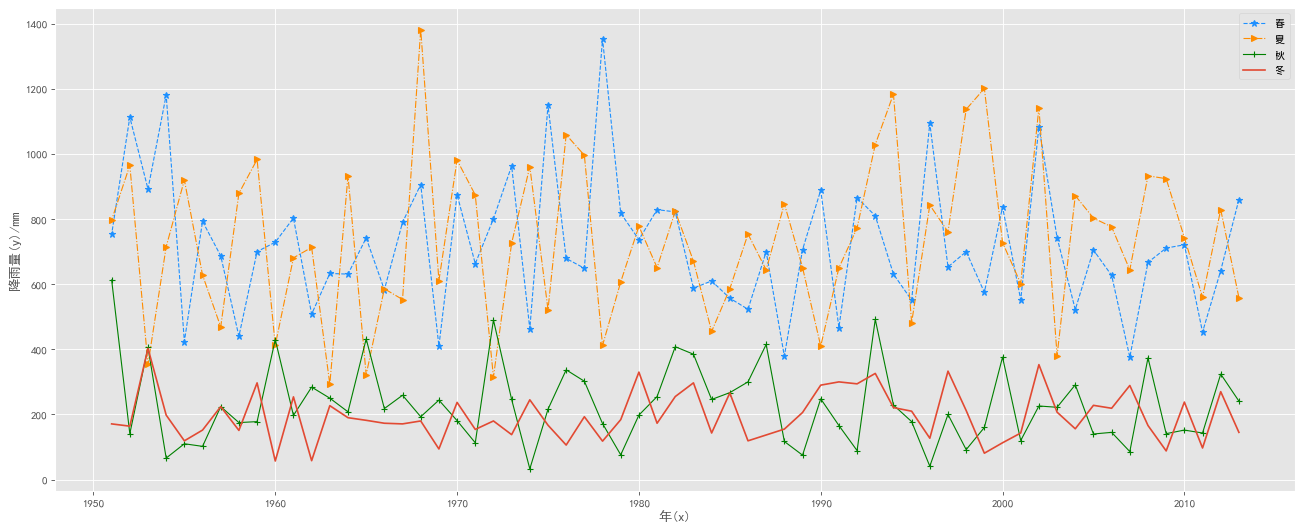

In [66]:
# https://blog.csdn.net/qq_41365597/article/details/101800171
from matplotlib import pyplot as plt

x = years
# 设置了图片大小，和图片的dpi
fig = plt.figure(figsize=(20, 8), dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x, spring,label = "春",marker = '*',color = 'dodgerblue',linewidth = '1',linestyle = '--')
plt.plot(x, summer,label = "夏",marker = '>',color = 'darkorange',linewidth = '1',linestyle = '-.')
plt.plot(x, fall,label = "秋",marker = '+',color = 'green',linewidth = '1')
plt.plot(x, winter,label = "冬")
plt.xlabel("年(x)")
plt.ylabel("降雨量(y)/mm")
plt.legend()
plt.show()

### Part2 利用前面数据训练，预测后十年的雨量，得出下雨和时间的关系模型

In [52]:
# 导入相关模块
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


style.use('ggplot')   
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

- 先判断序列的平稳性

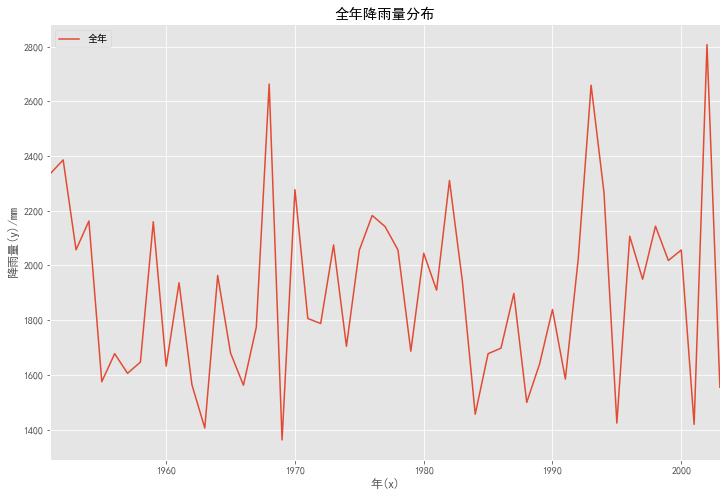

In [53]:
# 以全年降雨量作为数据集，一共是63个样本，打算53个作为训练集，10个作为验证集
# 因为样本就少，预计误差较大
stock = data["全年"]
stock_train = stock[10:63]
stock_test = stock[:10]
stock_train.plot(figsize=(12,8))
plt.xlabel("年(x)")
plt.ylabel("降雨量(y)/mm")
plt.legend()
plt.title("全年降雨量分布")
sns.despine()

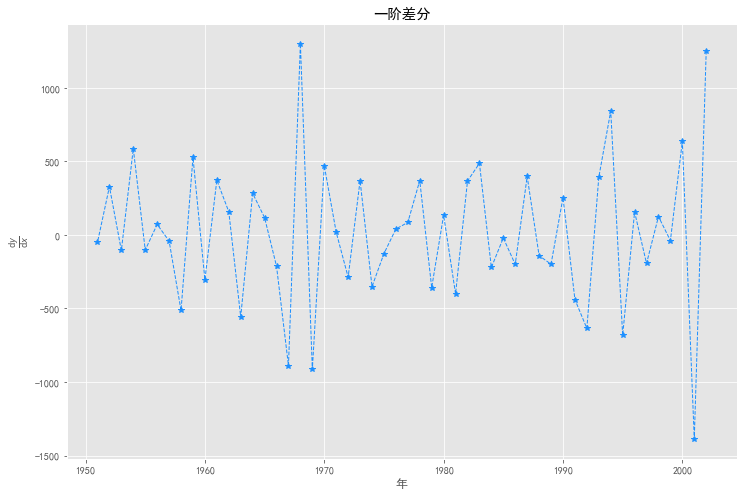

In [67]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()
 
plt.figure(figsize = (12,8))
plt.plot(stock_diff,marker = '*',color = 'dodgerblue',linewidth = '1',linestyle = '--')
plt.xlabel("年")
plt.ylabel( r"$\frac{\mathrm{d}y}{\mathrm{d}x}$")
plt.title('一阶差分')
plt.show()

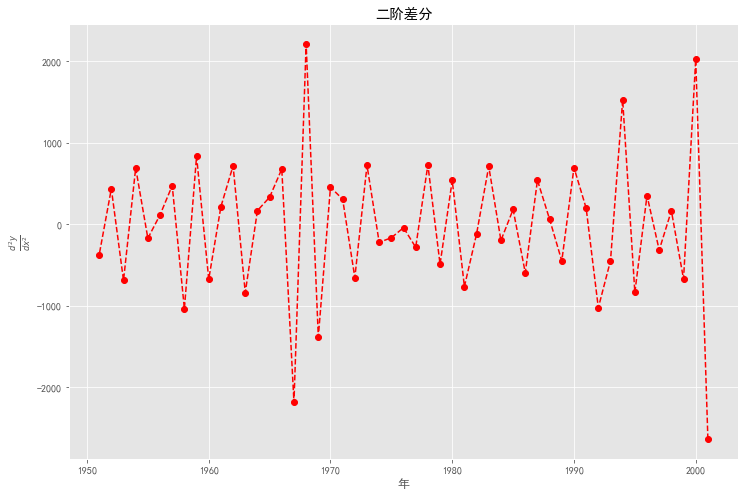

In [68]:
stock_second_diff = stock_diff.diff()
stock_second_diff = stock_second_diff.dropna()

plt.figure(figsize = (12,8))
plt.plot(stock_second_diff,c='r',linestyle='--',marker='o')
plt.xlabel("年")
plt.ylabel( r"$\frac{d^{2}y}{dx^{2}}$")
plt.title('二阶差分')
plt.show()

    先确定时间序列的差分d，图中可以看到一阶差分的图大致平稳，二阶差分的图和一阶差分的区别不大，所以这边设置d = 1

- 做自相关图和偏相关图

d:\python\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


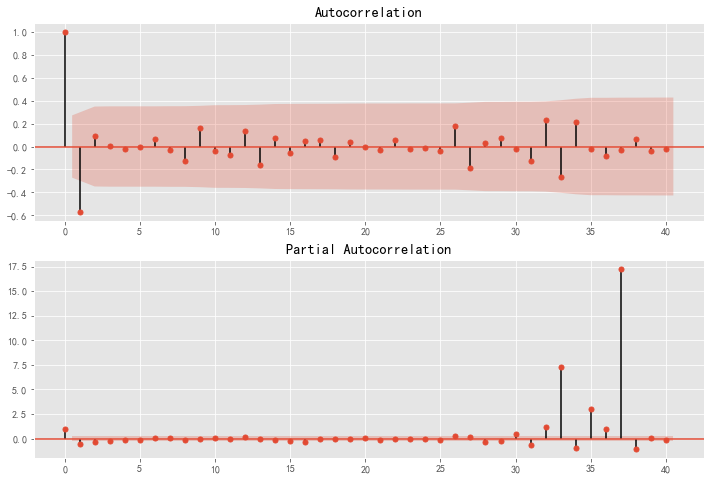

In [56]:
stock_diff.dropna(inplace=True) 
fig = plt.figure(figsize=(12,8)) 
ax1 = fig.add_subplot(211) 
fig = sm.graphics.tsa.plot_acf(stock_diff,lags=40,ax=ax1) 
ax2 = fig.add_subplot(212) 
fig = sm.graphics.tsa.plot_pacf(stock_diff,lags=40,ax=ax2)

其中lags表示滞后的阶数，以上分别得出了ACF和PACF图，通过观察知道：

- 自相关图显示1个阶超出了置信区间
- 偏相关图显示0之后的偏相关系数趋于0
- 所以可以采用ARMA(0,1)模型：即自相关图在滞后1阶之后缩小为0，且偏自相关缩小至0，则是一个阶数q=1的移动平均模型；

In [57]:
arma_mod01 = sm.tsa.ARMA(stock_diff,(0,1)).fit()
print("arma_mod01:",arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)

arma_mod01: 762.7810525941466 768.6347837498909 765.0252349630483


d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


模型检验

- 对ARMA(0,1)模型所产生的残差做自相关图

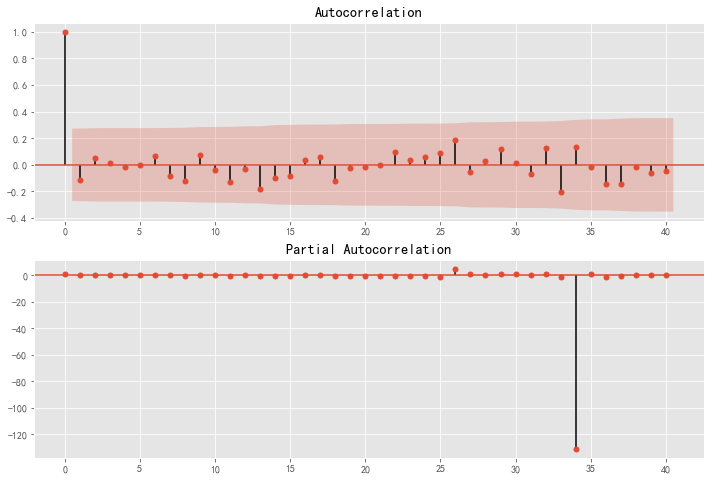

In [58]:
resid = arma_mod01.resid
#残差 
fig = plt.figure(figsize=(12,8)) 
ax1 = fig.add_subplot(211) 
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1) 
ax2 = fig.add_subplot(212) 
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

可以看到大部分都在置信区间，部分超出也只超出一点点

DW检验

- 是目前检验自相关性最常用的方法，但它只适用于检验一阶自相关性。当DW的值显著的接近于0或4时，则存在自相关性，而接近2时则不存在一阶自相关性

In [59]:
print(sm.stats.durbin_watson(resid))

1.982456059176944


观察是否符合正态分布

- 使用QQ图，用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自通一组分布

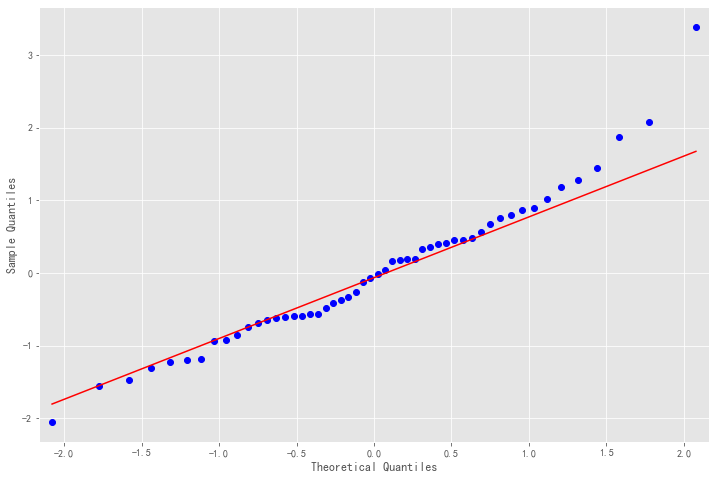

In [60]:
from statsmodels.graphics.api import qqplot 

fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [61]:
# 根据上图选择p、d、q指标
model = ARIMA(stock_train, order=(1, 0, 1))
result = model.fit()
# 统计出ARIMA模型的指标
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                     全年   No. Observations:                   53
Model:                     ARMA(1, 1)   Log Likelihood                -387.307
Method:                       css-mle   S.D. of innovations                nan
Date:                Tue, 13 Apr 2021   AIC                            782.614
Time:                        22:56:20   BIC                            790.495
Sample:                             0   HQIC                           785.645
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1913.1127     51.585     37.087      0.000    1812.009    2014.217
ar.L1.全年      -0.9002      0.065    -13.868      0.000      -1.027      -0.773
ma.L1.全年       1.0000        nan        nan        n

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\python\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
d:\python\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
d:\python\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
d:\python\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
d:\python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:224: RuntimeWarning: invalid value encountered in log
  Z_ma

In [62]:
# 开始进行验证
# 预测，指定起始与终止时间。预测值起始时间必须在原始数据中，终止时间不需要
# 53代表的是2003年
pred = result.predict(53,64)
# 修改默认索引
years_pred = [1950 + i for i in range(53,65)]
pred

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


53    1776.615082
54    2035.986101
55    1802.503791
56    2012.681433
57    1823.482340
58    1993.796825
59    1840.482011
60    1978.493949
61    1854.257454
62    1966.093480
63    1865.420190
64    1956.044935
dtype: float64

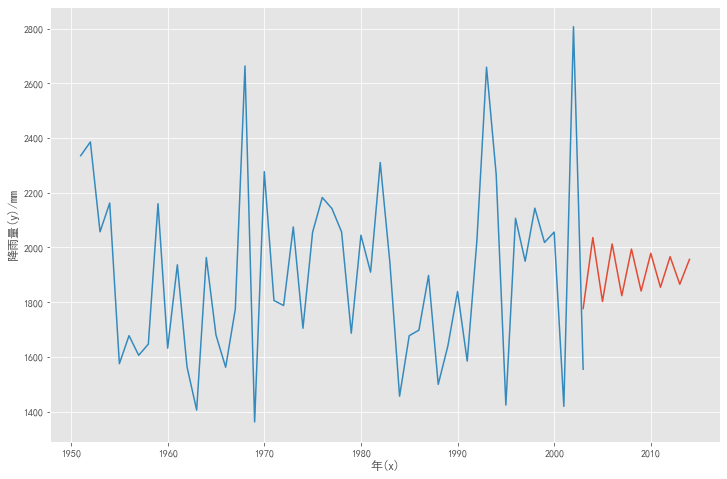

In [63]:
plt.figure(figsize=(12,8))
plt.plot(years_pred,pred)
plt.xlabel("年(x)")
plt.ylabel("降雨量(y)/mm")
plt.plot(stock_train)
#[<matplotlib.lines.Line2D at 0x28025665278>]

### Part3 根据降雨程度做出灾害预测